# <center> World Happiness Data Preprocessing Project

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Source Datasets

In [2]:
wh15 = pd.read_csv('wh_2015.csv')
wh16 = pd.read_csv('wh_2016.csv')
wh17 = pd.read_csv('wh_2017.csv')

## 3. Combining Datasets

In [3]:
df = pd.concat([wh15 , wh16 , wh17] , ignore_index = True)

In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


## 4. Dimensions of the Dataset

In [5]:
print('Number of rows:' ,df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 468
Number of columns: 17


## 5. Data types, Memory Usage , Null\Non-null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        463 non-null    object 
 1   Region                         316 non-null    object 
 2   Happiness Rank                 468 non-null    int64  
 3   Happiness Score                468 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       468 non-null    float64
 6   Family                         419 non-null    float64
 7   Health (Life Expectancy)       468 non-null    float64
 8   Freedom                        468 non-null    float64
 9   Trust (Government Corruption)  468 non-null    float64
 10  Generosity                     468 non-null    float64
 11  Dystopia Residual              468 non-null    float64
 12  Year                           468 non-null    int

`We can see that this method prints information of all columns. Several columns contain missing values. Either we have to drop them or replaced with a suitable test statistic.Lets investigate!`

## 6. Handling Duplicates

In [7]:
print('Is there any duplicate value?' , df.duplicated(subset = ['Country' , ('Year')]).any())

Is there any duplicate value? False


`Country name can be written like (nORWAY , NORWAY) to rectify this type of problem, we need to capitalize 'country' column`

In [8]:
df['Country'] = df['Country'].str.upper()
df['Country']

0      SWITZERLAND
1          ICELAND
2          DENMARK
3           NORWAY
4           CANADA
          ...     
463        LIBERIA
464         GUINEA
465           TOGO
466         RWANDA
467          SYRIA
Name: Country, Length: 468, dtype: object

In [9]:
print('Is there any duplicate value?' , df.duplicated(subset = ['Country' , ('Year')]).any())

Is there any duplicate value? True


In [10]:
df[df.duplicated(subset = ['Country' , ('Year')])]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
255,SOMALILAND REGION,SUB-SAHARAN AFRICA,97,5.057,NaN,0.25558,0.75862,0.33108,0.3913,0.36794,0.51479,2.43801,2016,4.934,5.18,NaN,NaN


In [11]:
df.drop_duplicates(subset = ['Year' , 'Country'] , inplace = True)

In [12]:
print('Is there any duplicate value?' , df.duplicated(subset = ['Country' , ('Year')]).any())

Is there any duplicate value? False


`We can see that there is no duplicate value left in the dataset `

## Handling Null / Missing Values

In [13]:
print('Is there any Null value?' , df.isnull().sum().any())

Is there any Null value? True


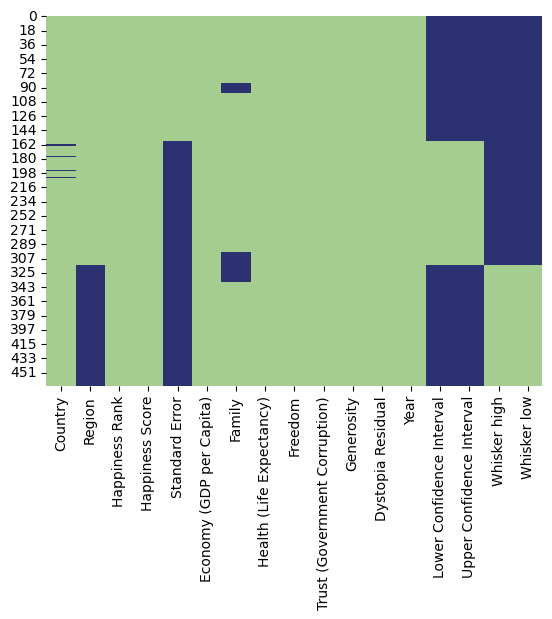

In [14]:
sns.heatmap(df.isnull() , cmap = 'crest' , cbar = False)
plt.show()

`We can see that there are many null values in 'Country', 'Region', 'Standard Error', 'Family', 'Lower Conf Interval', 'Upper Conf Interval' columns`

#### Finding Null values percentage 


In [15]:
null_perc = (df.isnull().mean() * 100).sort_values(ascending = False)
null_perc

Whisker low                      67.451820
Whisker high                     67.451820
Upper Confidence Interval        66.381156
Lower Confidence Interval        66.381156
Standard Error                   66.167024
Region                           32.548180
Family                           10.492505
Country                           1.070664
Health (Life Expectancy)          0.000000
Trust (Government Corruption)     0.000000
Generosity                        0.000000
Dystopia Residual                 0.000000
Year                              0.000000
Economy (GDP per Capita)          0.000000
Happiness Score                   0.000000
Happiness Rank                    0.000000
Freedom                           0.000000
dtype: float64

`Dropping columns having high perc of null values`

In [16]:
null_perc.index[:5]

Index(['Whisker low', 'Whisker high', 'Upper Confidence Interval',
       'Lower Confidence Interval', 'Standard Error'],
      dtype='object')

In [17]:
df.drop(null_perc.index[:5], axis = 1 , inplace  = True)

#### Checking columns with lower percentage of missingness

In [18]:
df.isnull().sum().sort_values(ascending = False)

Region                           152
Family                            49
Country                            5
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
dtype: int64

### Dealing with Categorical Values

#### Target column: 'Country'

In [19]:
df[df['Country'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
162,NaN,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,0
163,NaN,Western Europe,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,1
177,NaN,Latin America and Caribbean,20,6.871,1.69752,1.03999,0.84542,0.54870,0.35329,0.27571,2.11055,2
195,NaN,Middle East and Northern Africa,38,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,3
203,NaN,Central and Eastern Europe,46,6.068,0.87370,0.80975,0.59600,0.37269,0.10613,0.08877,3.22134,4


`We can see that above shown rows have missing data in 'Country' column `

`Dropping those rows`

In [20]:
df.dropna(subset = ['Country'] , how = 'any' , inplace = True)

`Dropping row disturbs indexing so we are reseting index number`

In [21]:
df.reset_index(drop = True , inplace = True)

#### Target column: 'Region'

In [22]:
df[df['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
310,NORWAY,NaN,1,7.537,1.616463,NaN,0.796667,0.635423,0.362012,0.315964,2.277027,2017
311,DENMARK,NaN,2,7.522,1.482383,NaN,0.792566,0.626007,0.355280,0.400770,2.313707,2017
312,ICELAND,NaN,3,7.504,1.480633,NaN,0.833552,0.627163,0.475540,0.153527,2.322715,2017
313,SWITZERLAND,NaN,4,7.494,1.564980,NaN,0.858131,0.620071,0.290549,0.367007,2.276716,2017
314,FINLAND,NaN,5,7.469,1.443572,NaN,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
457,LIBERIA,NaN,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,2017
458,GUINEA,NaN,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,2017
459,TOGO,NaN,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,2017
460,RWANDA,NaN,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017


`There are 152 rows having 'NaN' values in the dataset.`

`Lets impute them with appropriate regions.`

In [23]:
df2 = pd.read_csv('region.csv')

In [24]:
df2.head()

,Country,Region
0,SWITZERLAND,Western Europe
1,ICELAND,Western Europe
2,DENMARK,Western Europe
3,NORWAY,Western Europe
4,CANADA,North America


In [25]:
left_table = df['Country']
right_table = df2 

In [26]:
pd.merge(left = left_table , right = right_table, on = 'Country' , how = 'inner')

,Country,Region
0,SWITZERLAND,Western Europe
1,SWITZERLAND,Western Europe
2,SWITZERLAND,Western Europe
3,ICELAND,Western Europe
4,ICELAND,Western Europe
...,...,...
459,SOMALIA,Sub-Saharan Africa
460,NAMIBIA,Sub-Saharan Africa
461,NAMIBIA,Sub-Saharan Africa
462,SOUTH SUDAN,Sub-Saharan Africa


In [27]:
region = pd.merge(left = left_table , right = right_table, \
                  on = 'Country' , how = 'inner')['Region']

region

0          Western Europe
1          Western Europe
2          Western Europe
3          Western Europe
4          Western Europe
              ...        
459    Sub-Saharan Africa
460    Sub-Saharan Africa
461    Sub-Saharan Africa
462    Sub-Saharan Africa
463    Sub-Saharan Africa
Name: Region, Length: 464, dtype: object

In [28]:
df['Region'] = region
df['Region'] 

0                   Western Europe
1                   Western Europe
2                   Western Europe
3                   Western Europe
4                   Western Europe
                  ...             
457    Latin America and Caribbean
458             Sub-Saharan Africa
459             Sub-Saharan Africa
460             Sub-Saharan Africa
461             Sub-Saharan Africa
Name: Region, Length: 462, dtype: object

In [29]:
df.isnull().sum().sort_values(ascending = False)

Family                           49
Country                           0
Region                            0
Happiness Rank                    0
Happiness Score                   0
Economy (GDP per Capita)          0
Health (Life Expectancy)          0
Freedom                           0
Trust (Government Corruption)     0
Generosity                        0
Dystopia Residual                 0
Year                              0
dtype: int64

`There is no null value left in 'Country' , 'Region' Column.`

### Now, Dealing with Numerical Values

#### Target Column: 'Family'

##### Finding skewness Co efficient

In [30]:
df['Family'].skew()

-0.575432431765158

##### Checking skewness by Graph

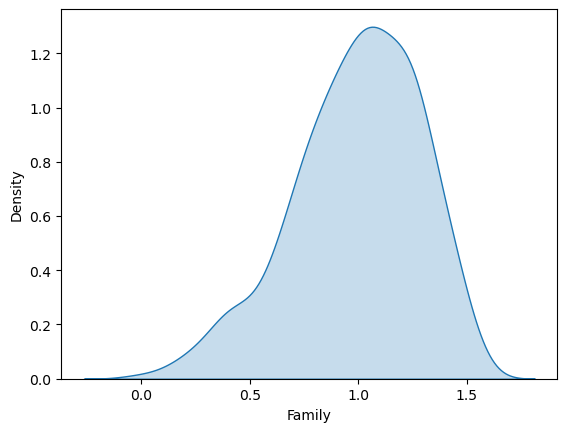

In [31]:
sns.kdeplot(df['Family'] , \
           fill = True)

plt.show()

`we can see that the distribution of values is approximately normal,`

`so we are imputing missing values with a mean value.`

In [32]:
fam_mean = df['Family'].mean()
fam_mean

0.9910465390024213

In [33]:
df['Family'] = df['Family'].fillna(df['Family'].skew())
df['Family']

0      1.349510
1      1.402230
2      1.360580
3      1.330950
4      1.322610
         ...   
457    0.872118
458    0.791245
459    0.431883
460    0.945707
461    0.396103
Name: Family, Length: 462, dtype: float64

In [34]:
df.isnull().sum().sort_values(ascending = False)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

`Now, when we look at our data, we can see that there are no missing or null values.`

`This concludes the data preprocessing for World Happiness Datasets`